In [1]:
# importing neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the csv file

df = pd.read_csv(r'C:\Workspace\data\food_claims_2212.csv')

In [3]:
# see the top 5 rows

df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


Task 1:
For every column in the data:

a. State whether the values match the description given in the table above.
b. State the number of missing values in the column.
c. Describe what you did to make values match the description if they did not
match.

**Claim ID:** The column matched the description. They are non-missing values. The values are unique. No changes were made in this column.

**Time to Close:** The column matched the description given. They were non missing values. No changes were made in this column.

**Claim Amount:** The column do not exactly matched the description given. They were non-null missing values. The data type is changed to the one given in the description. 

**Amount Paid:** They were 36 missing values in this column. The missing values were replaced with the median value of the column.

**Location:** They were non-missing values. The column has four(4) that matches those in the description. They were non-missing values.No changes were made in this column.

**Individuals on Claim:** The  column matched the description. They were non-missing values. No changes were made in this column.
 
**Linked Cases:** They were 26 missing values which is replaced with the False value as described.          

**Cause:** Non-missing values. The values in this column are not consistent(Meat,meat, unknown, vegetables and VEGETABLE), the "Meat" values are changed to "meat" and "VEGETABLES" to "vegetable".  

In [4]:
# see the information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [5]:
# checking for how many unique values in each column.

df.nunique()

claim_id                2000
time_to_close            256
claim_amount            2000
amount_paid             1963
location                   4
individuals_on_claim      15
linked_cases               2
cause                      5
dtype: int64

In [6]:
# summary statistics of each column

df.describe(include='all')

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
count,2000.000000,2000.00000,2000,1964.000000,2000,2000.000000,1974,2000
unique,NaN,NaN,2000,NaN,4,NaN,2,5
top,NaN,NaN,R$ 74474.55,NaN,RECIFE,NaN,False,meat
freq,NaN,NaN,1,NaN,885,NaN,1493,943
mean,1000.500000,185.56800,NaN,21541.975183,NaN,8.049500,NaN,NaN
std,577.494589,49.16339,NaN,12530.156509,NaN,4.087347,NaN,NaN
min,1.000000,76.00000,NaN,1516.720000,NaN,1.000000,NaN,NaN
25%,500.750000,158.00000,NaN,10995.950000,NaN,4.000000,NaN,NaN
50%,1000.500000,179.00000,NaN,20105.700000,NaN,8.000000,NaN,NaN
75%,1500.250000,204.00000,NaN,30709.350000,NaN,12.000000,NaN,NaN


In [7]:
# Changing the claim amount to float
df['claim_amount'] = df['claim_amount'].apply(lambda x: x.replace('R$','')).astype('float')

In [8]:
df['claim_amount']

0       74474.55
1       52137.83
2       24447.20
3       29006.28
4       19520.60
          ...   
1995    28982.30
1996     5188.44
1997    11975.85
1998    23516.28
1999     8051.40
Name: claim_amount, Length: 2000, dtype: float64

In [9]:
# confirming the datatypes
df.dtypes

claim_id                  int64
time_to_close             int64
claim_amount            float64
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases             object
cause                    object
dtype: object

In [10]:
# checking how many missing values are in amount paid

df['amount_paid'].isna().sum()

36

In [11]:
# replacing the null values with the median

df['amount_paid'] = df['amount_paid'].replace(0, np.median(df['amount_paid']))

In [12]:
# checking the unique location

df['location'].unique() 

array(['RECIFE', 'FORTALEZA', 'SAO LUIS', 'NATAL'], dtype=object)

In [13]:
# checking how many values are missing in linked cases column

df['linked_cases'].isna().sum()

26

In [14]:
# replacing misssing values by bool False as instructed in the description

df['linked_cases'] = df['linked_cases'].fillna(False)

In [15]:
df['linked_cases'].value_counts()

False    1519
True      481
Name: linked_cases, dtype: int64

In [16]:
# check the unique values in cause column

df['cause'].unique()

array(['unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES'],
      dtype=object)

In [17]:
# Replacing "VEGETABLES" with “vegetable” and " Meat" with “meat”. “unknown” remain same

df['cause'] = df['cause'].replace(' Meat', 'meat')
df['cause'] = df['cause'].replace('VEGETABLES', 'vegetable')

In [18]:
# confirming the unique values

df['cause'].unique()

array(['unknown', 'meat', 'vegetable'], dtype=object)

Task 2:
Create a visualization that shows the number of claims in each location. Use the visualization to:
A. State which category of the variable location has the most observations
B. Explain whether the observations are balanced across categories of the variable location

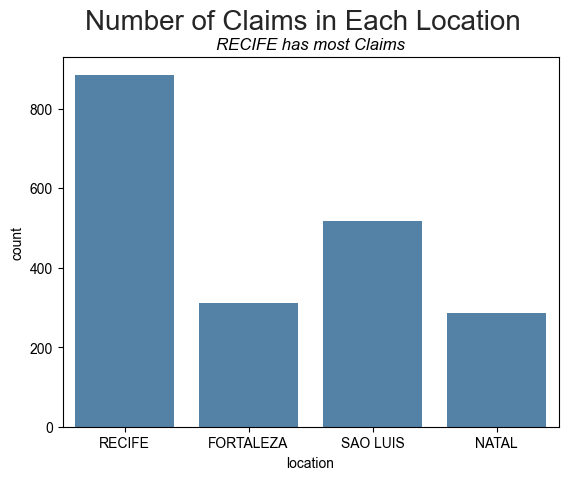

In [19]:
# plotting countplot

sns.countplot(x='location', data=df, color='steelblue')
sns.set_style("darkgrid")
plt.title('RECIFE has most Claims', style='italic')
plt.suptitle('Number of Claims in Each Location', fontsize=20)
plt.show()

There are four Locations included in this data which are RECIFE, SAO LUIS,
FORTALEZA and NATAL. The most common location is RECIFE, with SAO LUIS being second although with half the number
of locations. The categories are unbalanced, most observations are in RECIFE . 
The legal team should focus on RECIFE location more as they have most claims.

Task 3: Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

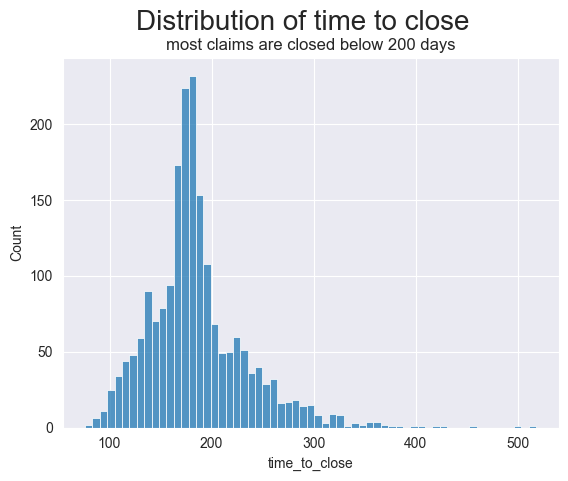

In [20]:
# plotting histogram

sns.histplot(data=df, x='time_to_close')
plt.suptitle('Distribution of time to close', fontsize=20)
plt.title('most claims are closed below 200 days')
plt.show()

From the graph above, we cand deduct that most claims are closed in less than 200 days. The distribution of the time to close a claim is right skewed. Few claims are closed over 350days. The Legal team should focus on claims that took over 200days and found out why is taking longer compared with those that were closed earlier

Task 4: Describe the relationship between time to close and location. Your answer must
    include a visualization to demonstrate the relationship.

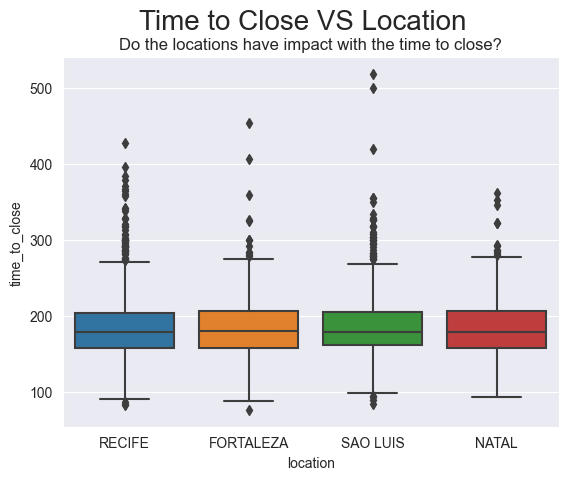

In [21]:
# plotting boxplot

sns.boxplot(data=df, x='location', y='time_to_close')
plt.suptitle('Time to Close VS Location', fontsize=20)
plt.title('Do the locations have impact with the time to close?')
plt.show()

From the chart above, the team should focus on SAO LUIS with time_to_close of over 500 days. Also, further analysis
should be carried out at SAO LUIS to know why it takes more days to claim compared to other location.
Further analysis should be done to understand if location really does impact time to claim.